In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


from scipy.stats import spearmanr

In [2]:
%matplotlib notebook

# Plot Playground

This notebook is exploratory in nature and designed to look at various correlations in the early light curve data from the ZTF 2018 sample. 

In [10]:
info_path="../../forced_lightcurves/sample_lc_v2/"
salt_df = pd.read_csv(info_path + "../../Nobs_cut_salt2_spec_subtype_pec.csv")
res = pd.read_csv('results_40percent.csv')

The useful columns from this database for plotting purposes: 

    name –– ZTF name of the SN
    z_adopt –– redshift of the SN
    z_source –– where the redshift was identified
    x1_salt2 –– SALT shape parameter
    c_salt2 –– SALT color parameter
    dm15B_rest –– Delta M15 measured in the B band, in the SN rest frame
    Ia subtype –– the SN subtype
    B_abs0_SALT2corr –– B-band absolute mag
    t0 –– time of first light
    t_rise –– rise time of the SN
    alpha_g –– rising index in the g-band
    alpha_r –– rising index in the r-band

In [11]:
salt_df['Ia subtype'].unique()

array(['normal', 'normal*', '99aa-like', 'SC*', '91T-like*', 'Ia-CSM',
       '02cx-like', '86G-like', 'SC', '99aa-like*', '91T-like'],
      dtype=object)

In [25]:
salt_df.z_adopt.iloc[normal_good_host]

14     0.018150
33     0.031518
37     0.047372
39     0.074600
41     0.065320
43     0.059427
44     0.072138
47     0.024167
48     0.064200
49     0.066741
52     0.027300
57     0.030869
69     0.066637
70     0.039300
72     0.064875
76     0.032300
79     0.018523
85     0.079000
89     0.038290
90     0.031662
107    0.083475
117    0.054860
119    0.031330
121    0.053800
125    0.078200
Name: z_adopt, dtype: float64

In [12]:
normal = np.where((salt_df['Ia subtype'] != 'Ia-CSM') & 
                  (salt_df['Ia subtype'] != 'SC') & 
                  (salt_df['Ia subtype'] != 'SC*') & 
                  (salt_df['Ia subtype'] != '86G-like') & 
                  (salt_df['Ia subtype'] != '02cx-like'))
good = np.where((res.final_selection.values == 1))
has_host_z = np.where(salt_df.z_source != 'Msl')

normal_good = np.intersect1d(normal, good)
normal_good_host = np.intersect1d(normal_good, has_host_z)

# rearange for plotting
normal_plot = np.setdiff1d(normal[0], normal_good)
normal_good_plot = np.setdiff1d(normal_good, normal_good_host)

## Plots

In [13]:
t_rise = res['t_rise_50'].values
t_rise_unc = np.vstack((res['t_rise_50'] - res['t_rise_05'],
                    res['t_rise_95'] - res['t_rise_50'])) 
alpha_g = res['flat_alpha_g_50'].values
alpha_g_unc = np.vstack((res['flat_alpha_g_50'] - res['flat_alpha_g_05'],
                         res['flat_alpha_g_95'] - res['flat_alpha_g_50']))
alpha_r = res['flat_alpha_r_50'].values
alpha_r_unc = np.vstack((res['flat_alpha_r_50'] - res['flat_alpha_r_05'],
                         res['flat_alpha_r_95'] - res['flat_alpha_r_50']))

<IPython.core.display.Javascript object>


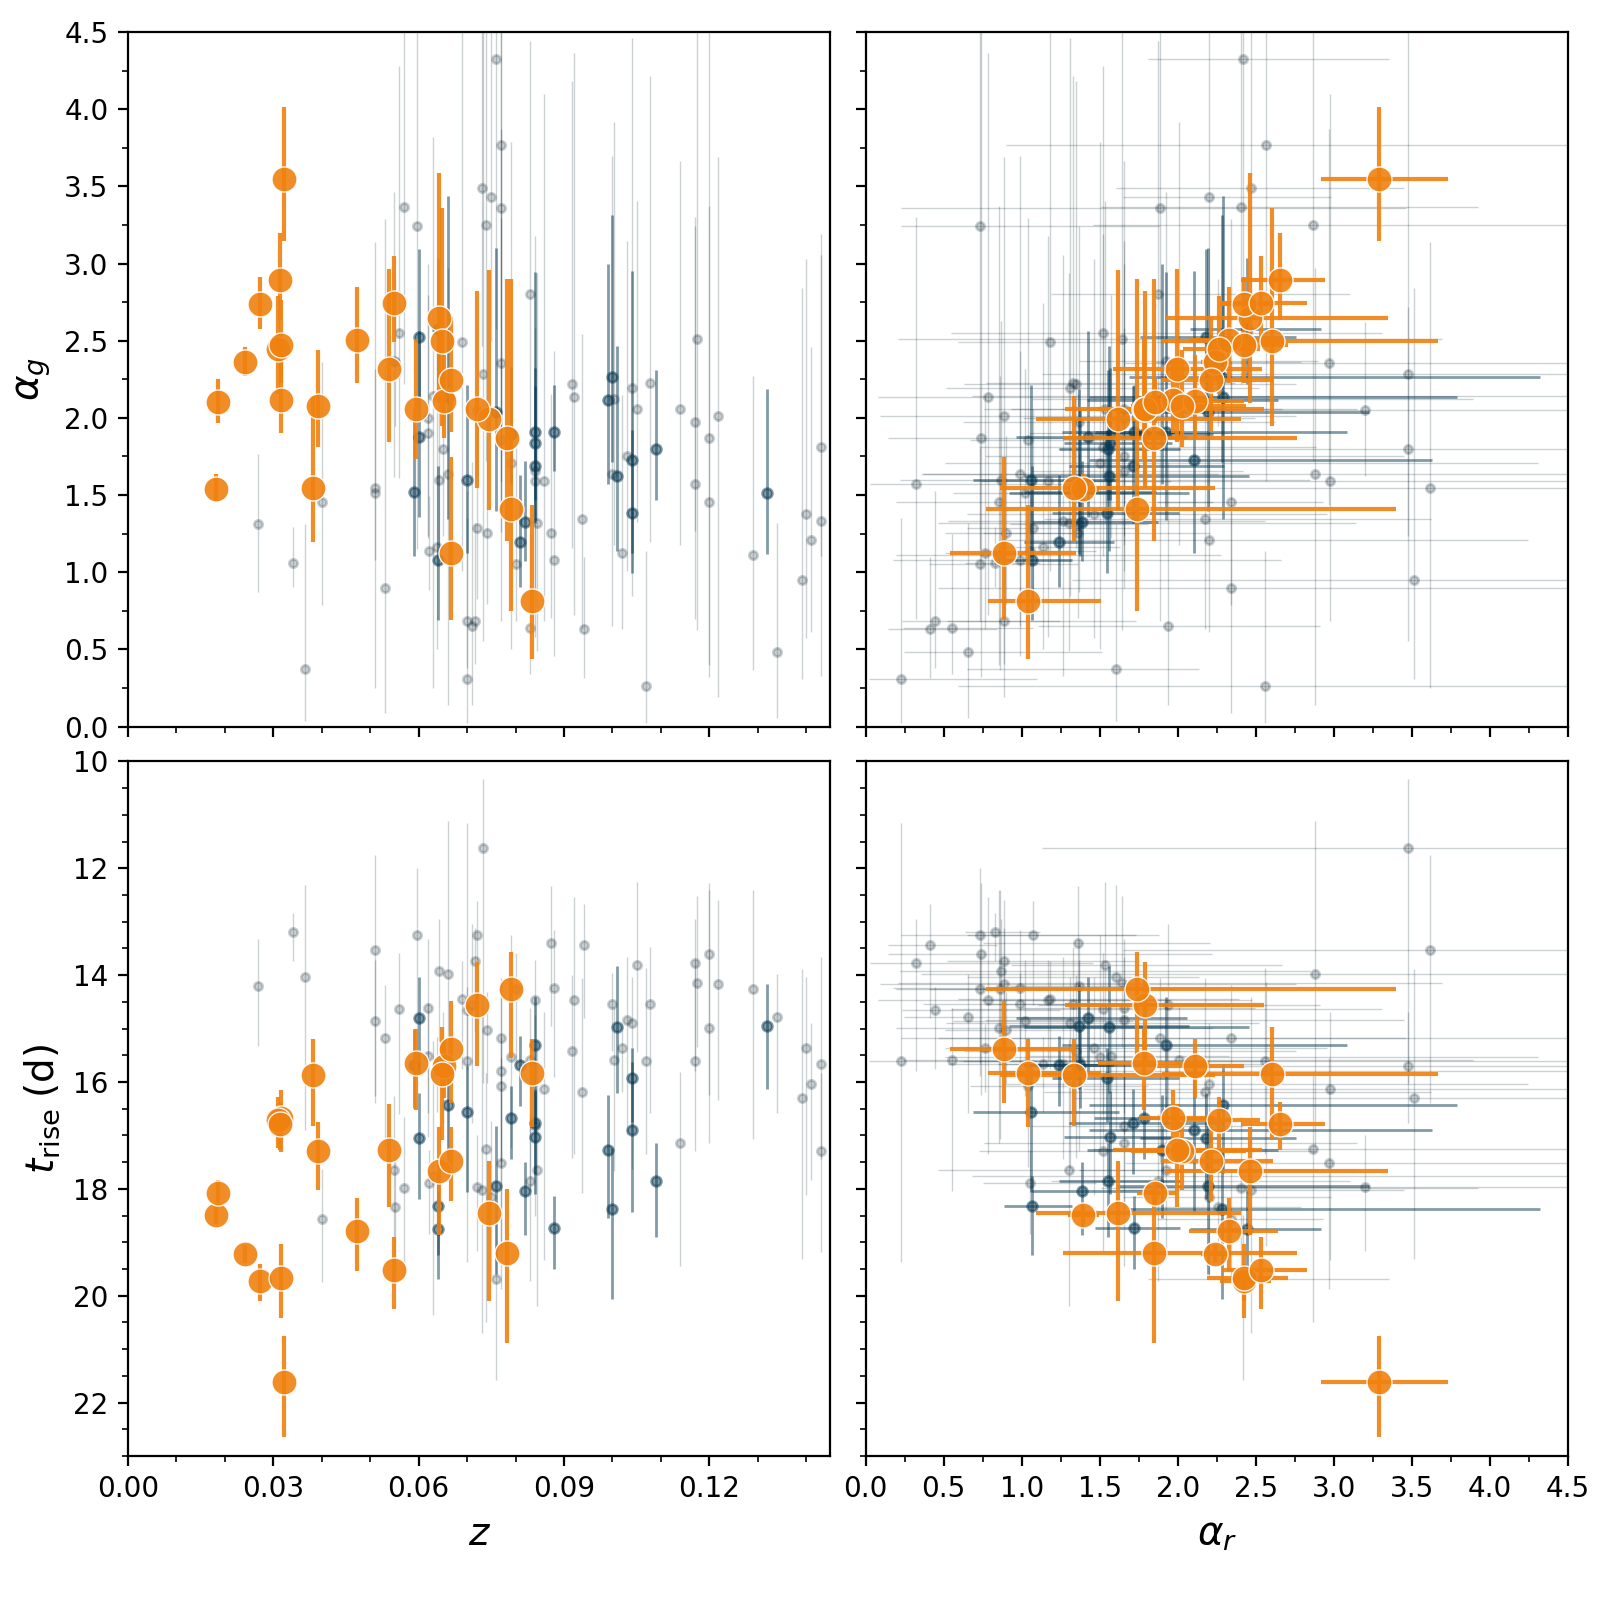

In [15]:
color_dict = {'orange': '#F0810F',
              'blueberry': '#063852',
              'dark navy': '#011A27'}

fig, axes = plt.subplots(2,2, figsize=(8,8))
#  alpha_g vs. redshift
axes[0,0].errorbar(salt_df.z_adopt.values[normal_plot], alpha_g[normal_plot], 
             yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[0,0].errorbar(salt_df.z_adopt.values[normal_good_plot], alpha_g[normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[0,0].errorbar(salt_df.z_adopt.values[normal_good_host], alpha_g[normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  rise vs. redshift
axes[1,0].errorbar(salt_df.z_adopt.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[1,0].errorbar(salt_df.z_adopt.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[1,0].errorbar(salt_df.z_adopt.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  alpha_g vs. alpha_r
axes[0,1].errorbar(alpha_r[normal_plot], alpha_g[normal_plot], 
                   xerr=alpha_r_unc[:,normal_plot], 
                   yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[0,1].errorbar(alpha_r[normal_good_plot], alpha_g[normal_good_plot], 
                   xerr=alpha_r_unc[:,normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[0,1].errorbar(alpha_r[normal_good_host], alpha_g[normal_good_host], 
                   xerr=alpha_r_unc[:,normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  t_rise vs. alpha_r
axes[1,1].errorbar(alpha_r[normal_plot], t_rise[normal_plot], 
                   xerr=alpha_r_unc[:,normal_plot], 
                   yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[1,1].errorbar(alpha_r[normal_good_plot], t_rise[normal_good_plot], 
                   xerr=alpha_r_unc[:,normal_good_plot], 
                   yerr=t_rise_unc[:,normal_good_plot], fmt='.',
                   color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[1,1].errorbar(alpha_r[normal_good_host], t_rise[normal_good_host], 
                   xerr=alpha_r_unc[:,normal_good_host], 
                   yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
                   color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

for ax in axes[0,:]:
    ax.set_ylabel(r'$\alpha_g$', fontsize=14)
    ax.set_ylim(0,4.5)
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))

for ax in axes[1,:]:
    ax.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
    ax.set_ylim(23,10)
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(2))

for ax in axes[:,0]:
    ax.set_xlabel(r'$z$', fontsize=14)
    ax.set_xlim(0,0.145)
    ax.xaxis.set_minor_locator(MultipleLocator(0.01))
    ax.xaxis.set_major_locator(MultipleLocator(0.03))

for ax in axes[:,1]:
    ax.set_xlabel(r'$\alpha_r$', fontsize=14)
    ax.set_xlim(0,4.5)
    ax.xaxis.set_minor_locator(MultipleLocator(0.25))
    ax.xaxis.set_major_locator(MultipleLocator(0.5))

for ax in axes[0,:]:
    ax.set_xticklabels([])
    ax.set_xlabel('')

for ax in axes[:,1]:
    ax.set_yticklabels([])
    ax.set_ylabel('')

# for ax in axes.flatten():
#     ax.tick_params(top=True,right=True,which='both', labelsize=11)
    
fig.subplots_adjust(top=0.98,right=0.98,left=0.08,bottom=0.09,hspace=0.05, wspace=0.05)
fig.savefig('param_correlations.pdf')

## $X_1$ vs. rise time

<IPython.core.display.Javascript object>


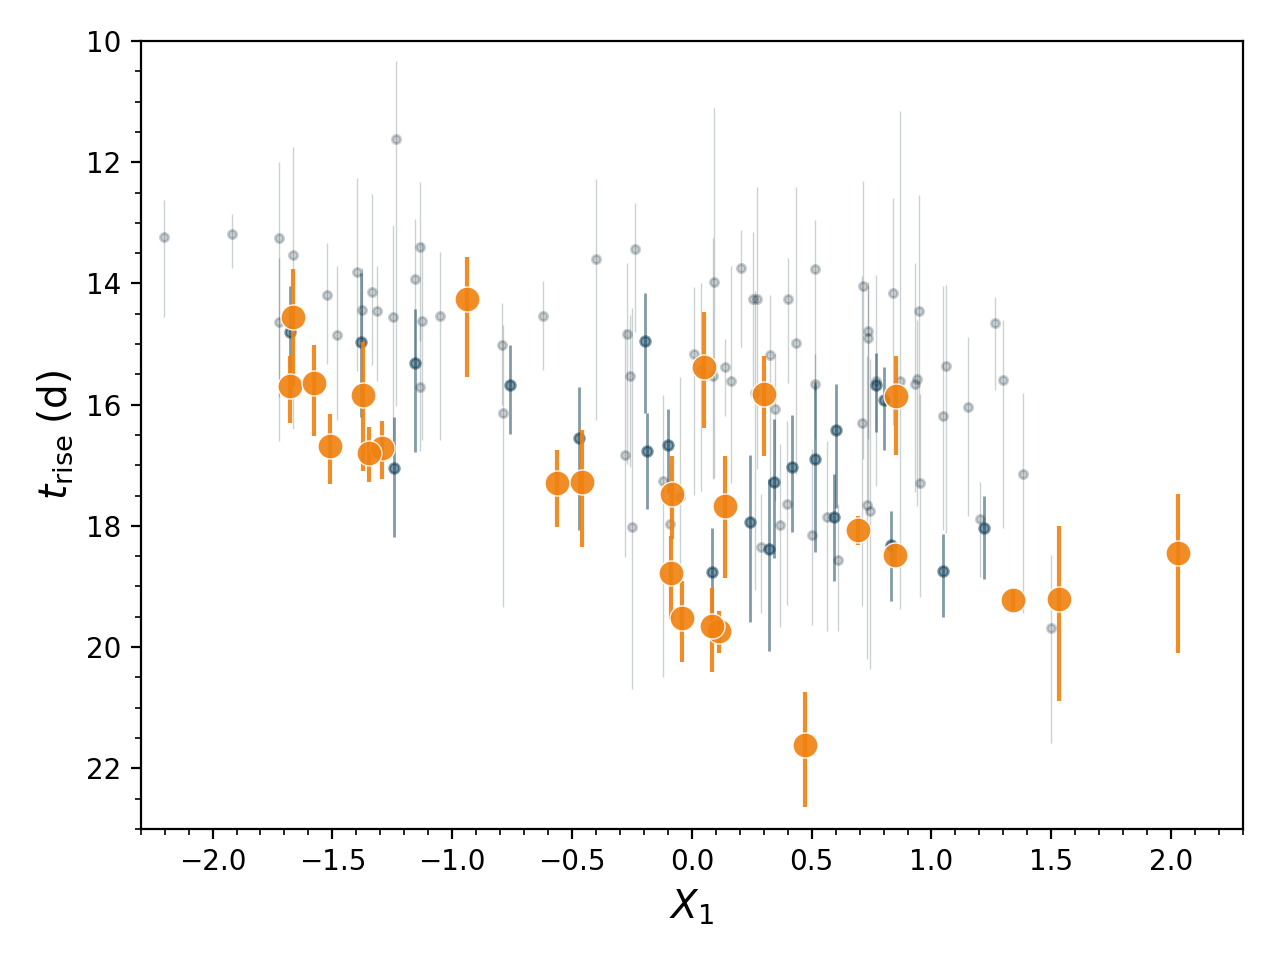

In [16]:
fig, ax = plt.subplots()

#  rise vs. redshift
ax.errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

ax.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
ax.set_ylim(23,10)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(2))

ax.set_xlabel(r'$X_1$', fontsize=14)
ax.set_xlim(-2.3,2.3)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

fig.tight_layout()

In [17]:
z_cut = 0.04
low_cut = 0.04
high_cut = 0.065
low_z = np.where(salt_df.z_adopt <= z_cut)
mid_z = np.where((low_cut < salt_df.z_adopt) & (salt_df.z_adopt <= high_cut))
high_z = np.where(salt_df.z_adopt > high_cut)

good_host_low_z = np.intersect1d(normal_good_host, low_z[0])
good_host_mid_z = np.intersect1d(normal_good_host, mid_z[0])
good_host_high_z = np.intersect1d(normal_good_host, high_z[0])

<IPython.core.display.Javascript object>


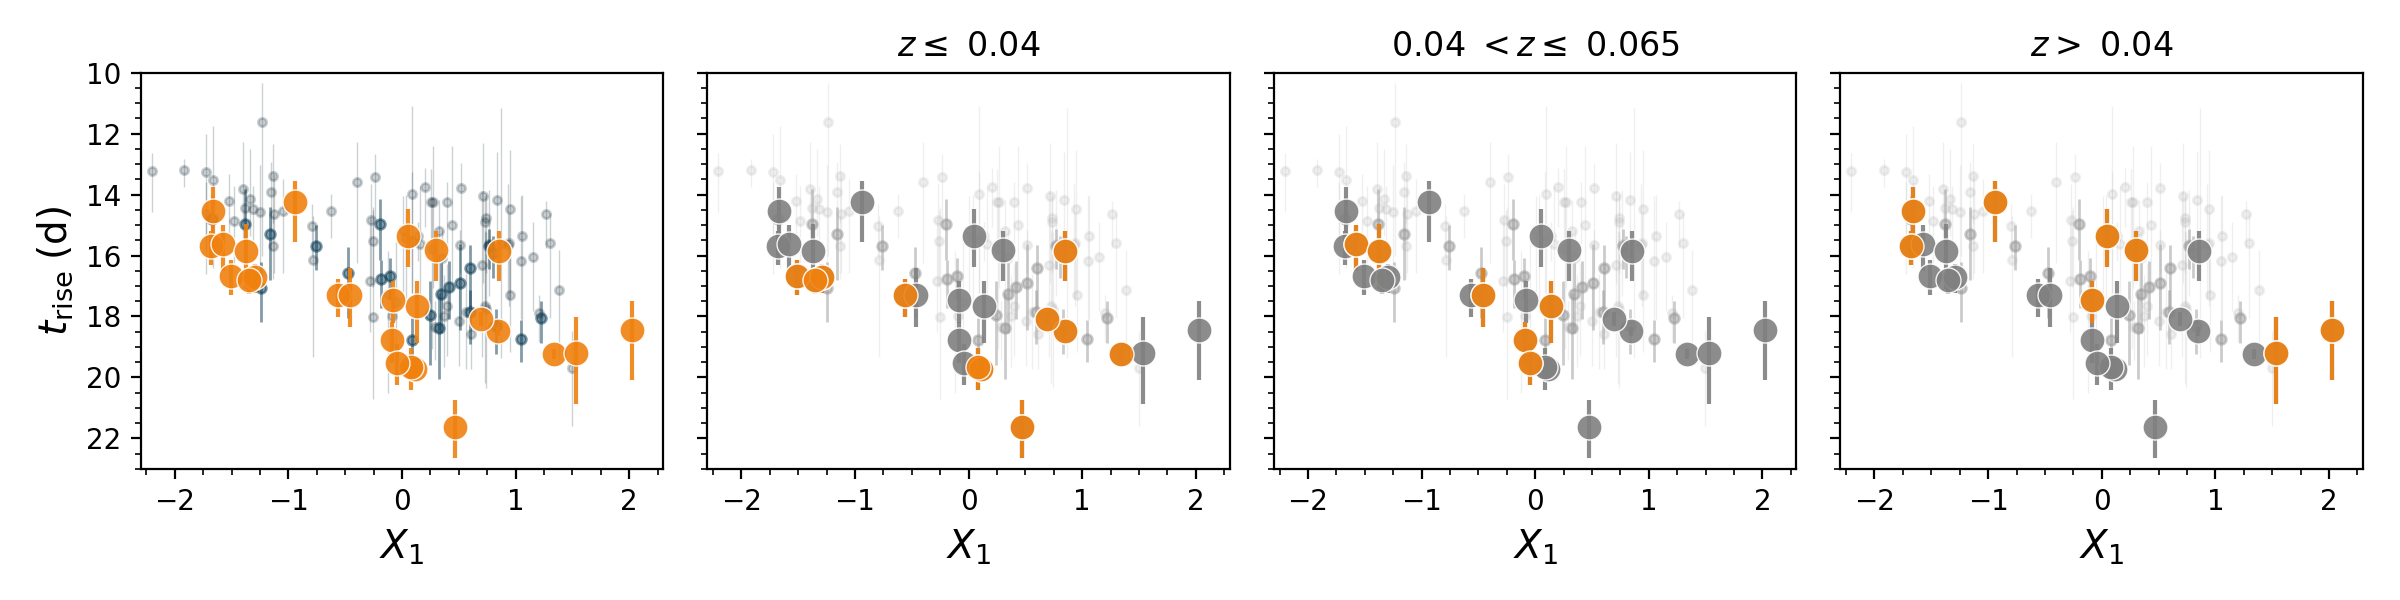

In [18]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, sharex=True, sharey=True, figsize=(12,3))

#  rise vs. redshift
ax0.errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax0.errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax0.errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

for ax in [ax1, ax2, ax3]:
    ax.errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
                yerr=t_rise_unc[:,normal_plot], fmt='.', 
                color='0.7', lw=0.5, alpha=0.2)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
                yerr=t_rise_unc[:,normal_good_plot], fmt='.',
                color='0.6', lw=1, ms=7, alpha=0.5)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
                yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
                color='0.5', mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
    ax.set_xlabel(r'$X_1$', fontsize=14)

ax1.errorbar(salt_df.x1_salt2.values[good_host_low_z], t_rise[good_host_low_z], 
             yerr=t_rise_unc[:,good_host_low_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax1.set_title(r'$z \leq$ {}'.format(z_cut),fontsize=12)
ax2.errorbar(salt_df.x1_salt2.values[good_host_mid_z], t_rise[good_host_mid_z], 
             yerr=t_rise_unc[:,good_host_mid_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax2.set_title(r'{} $< z \leq$ {}'.format(low_cut, high_cut),fontsize=12)
ax3.errorbar(salt_df.x1_salt2.values[good_host_high_z], t_rise[good_host_high_z], 
             yerr=t_rise_unc[:,good_host_high_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax3.set_title(r'$z >$ {}'.format(z_cut),fontsize=12)

ax0.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
ax0.set_ylim(23,10)
ax0.yaxis.set_minor_locator(MultipleLocator(0.5))
ax0.yaxis.set_major_locator(MultipleLocator(2))

ax0.set_xlabel(r'$X_1$', fontsize=14)
ax0.set_xlim(-2.3,2.3)
ax0.xaxis.set_minor_locator(MultipleLocator(0.25))
ax0.xaxis.set_major_locator(MultipleLocator(1))

fig.tight_layout()

## $X_1$ vs. $\alpha$

<IPython.core.display.Javascript object>


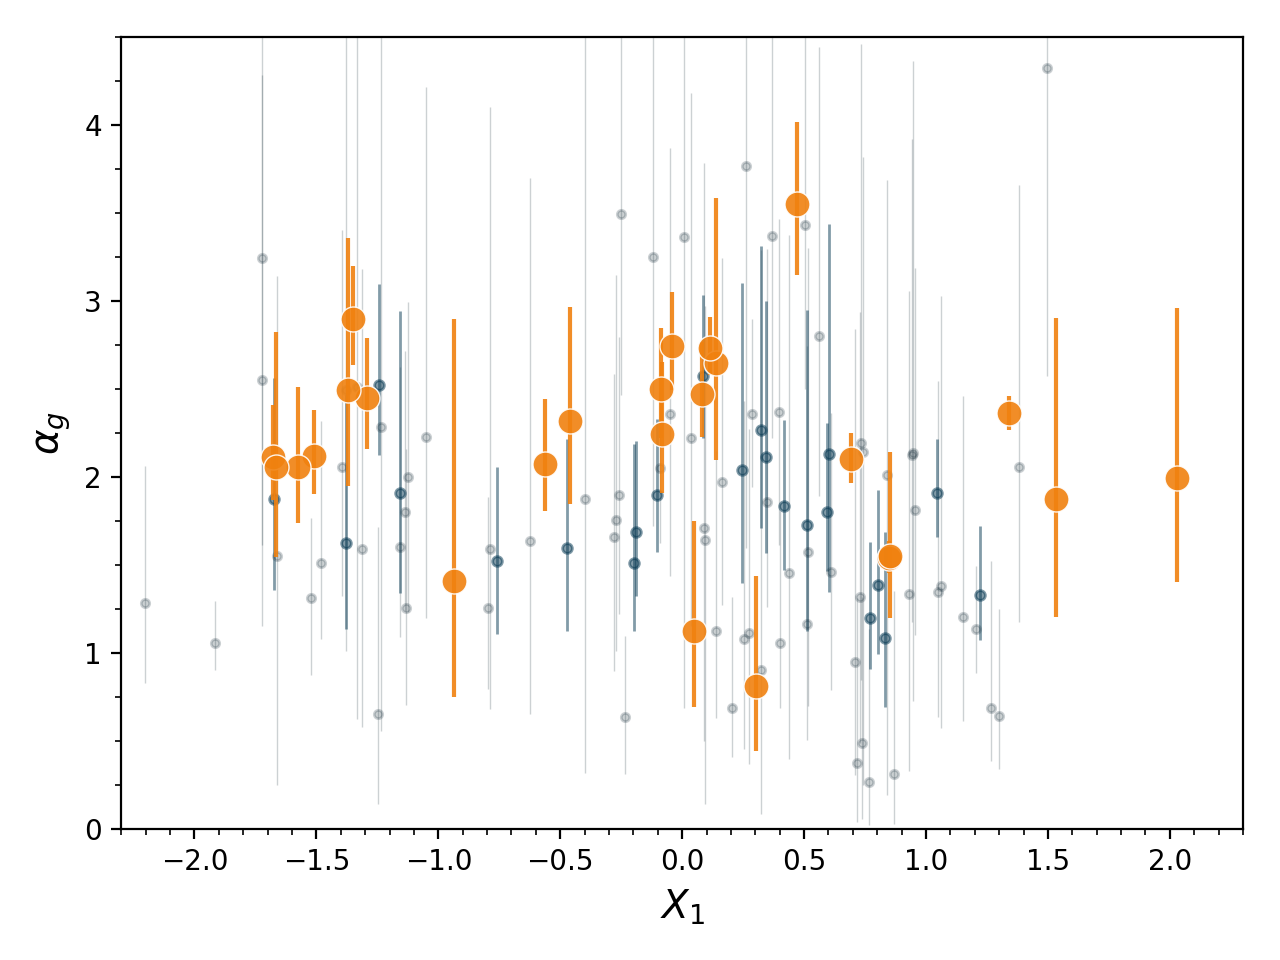

In [20]:
fig, ax = plt.subplots()

#  rise vs. redshift
ax.errorbar(salt_df.x1_salt2.values[normal_plot], alpha_g[normal_plot], 
             yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], alpha_g[normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

ax.set_ylabel(r'$\alpha_g$', fontsize=14)
ax.set_ylim(0,4.5)
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.set_xlabel(r'$X_1$', fontsize=14)
ax.set_xlim(-2.3,2.3)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

fig.tight_layout()

<IPython.core.display.Javascript object>


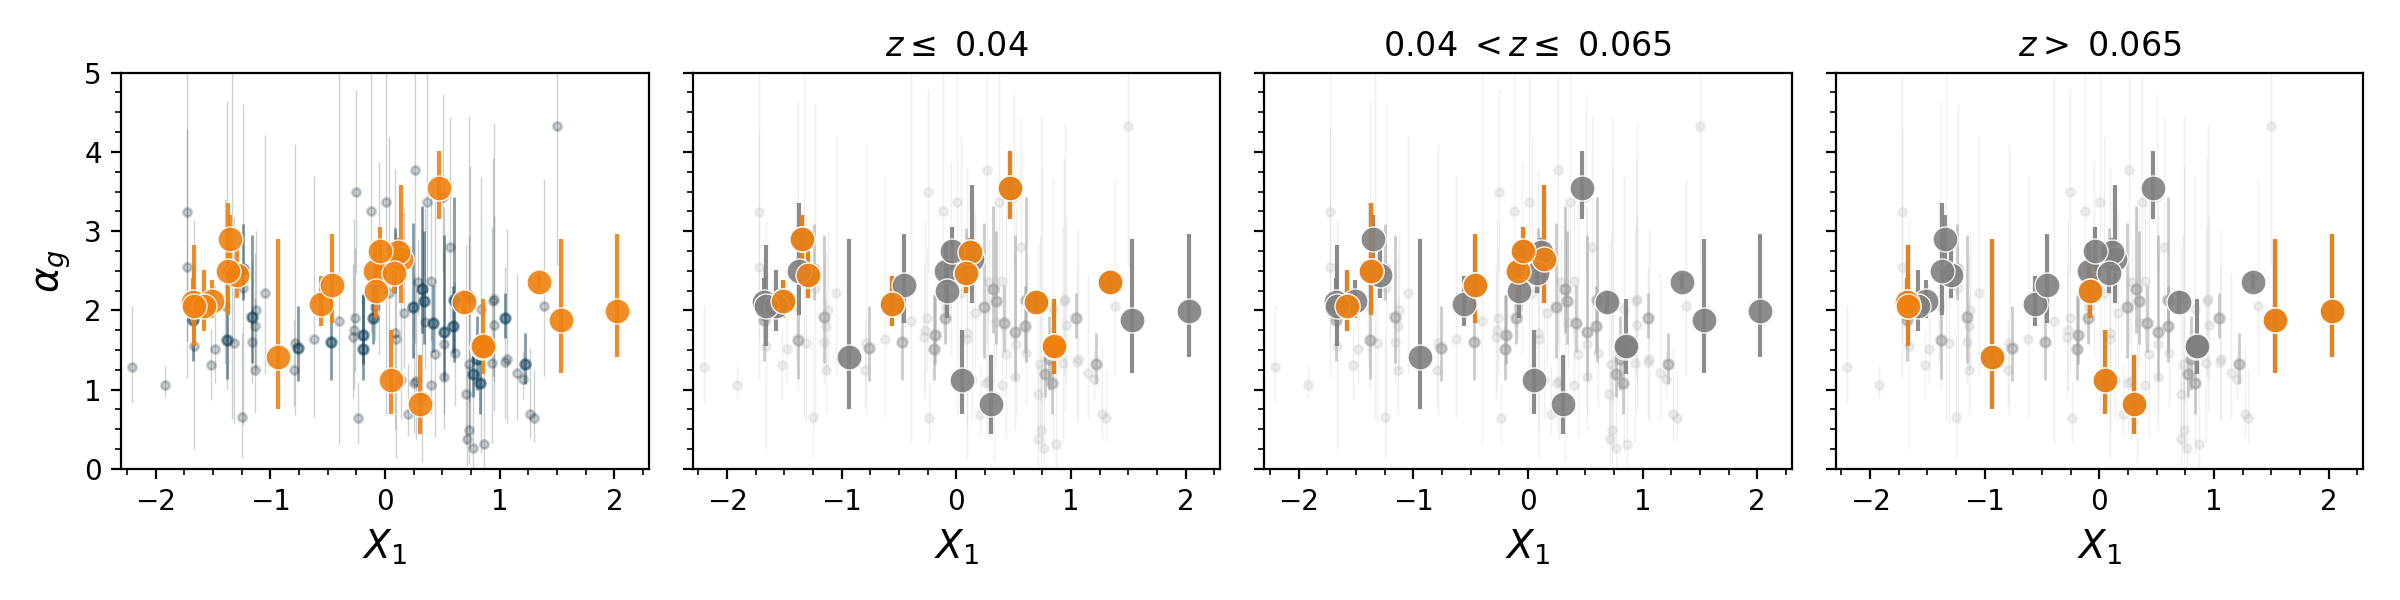

In [21]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, sharex=True, sharey=True, figsize=(12,3))

#  rise vs. redshift
ax0.errorbar(salt_df.x1_salt2.values[normal_plot], alpha_g[normal_plot], 
             yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax0.errorbar(salt_df.x1_salt2.values[normal_good_plot], alpha_g[normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax0.errorbar(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

for ax in [ax1, ax2, ax3]:
    ax.errorbar(salt_df.x1_salt2.values[normal_plot], alpha_g[normal_plot], 
                 yerr=alpha_g_unc[:,normal_plot], fmt='.', 
                  color='0.7', lw=0.5, alpha=0.2)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], alpha_g[normal_good_plot], 
                 yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
                 color='0.6', lw=1, ms=7, alpha=0.5)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host], 
                 yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
                 color='0.5', mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
    ax.set_xlabel(r'$X_1$', fontsize=14)

ax1.errorbar(salt_df.x1_salt2.values[good_host_low_z], alpha_g[good_host_low_z], 
             yerr=alpha_g_unc[:,good_host_low_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax1.set_title(r'$z \leq$ {}'.format(low_cut),fontsize=12)
ax2.errorbar(salt_df.x1_salt2.values[good_host_mid_z], alpha_g[good_host_mid_z], 
             yerr=alpha_g_unc[:,good_host_mid_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax2.set_title(r'{} $< z \leq$ {}'.format(low_cut, high_cut),fontsize=12)
ax3.errorbar(salt_df.x1_salt2.values[good_host_high_z], alpha_g[good_host_high_z], 
             yerr=alpha_g_unc[:,good_host_high_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax3.set_title(r'$z >$ {}'.format(high_cut),fontsize=12)

ax0.set_ylabel(r'$\alpha_g$', fontsize=14)
ax0.set_ylim(0,5)
ax0.yaxis.set_minor_locator(MultipleLocator(0.25))
ax0.yaxis.set_major_locator(MultipleLocator(1))

ax0.set_xlabel(r'$X_1$', fontsize=14)
ax0.set_xlim(-2.3,2.3)
ax0.xaxis.set_minor_locator(MultipleLocator(0.25))
ax0.xaxis.set_major_locator(MultipleLocator(1))

fig.tight_layout()

### Put these all together

<IPython.core.display.Javascript object>


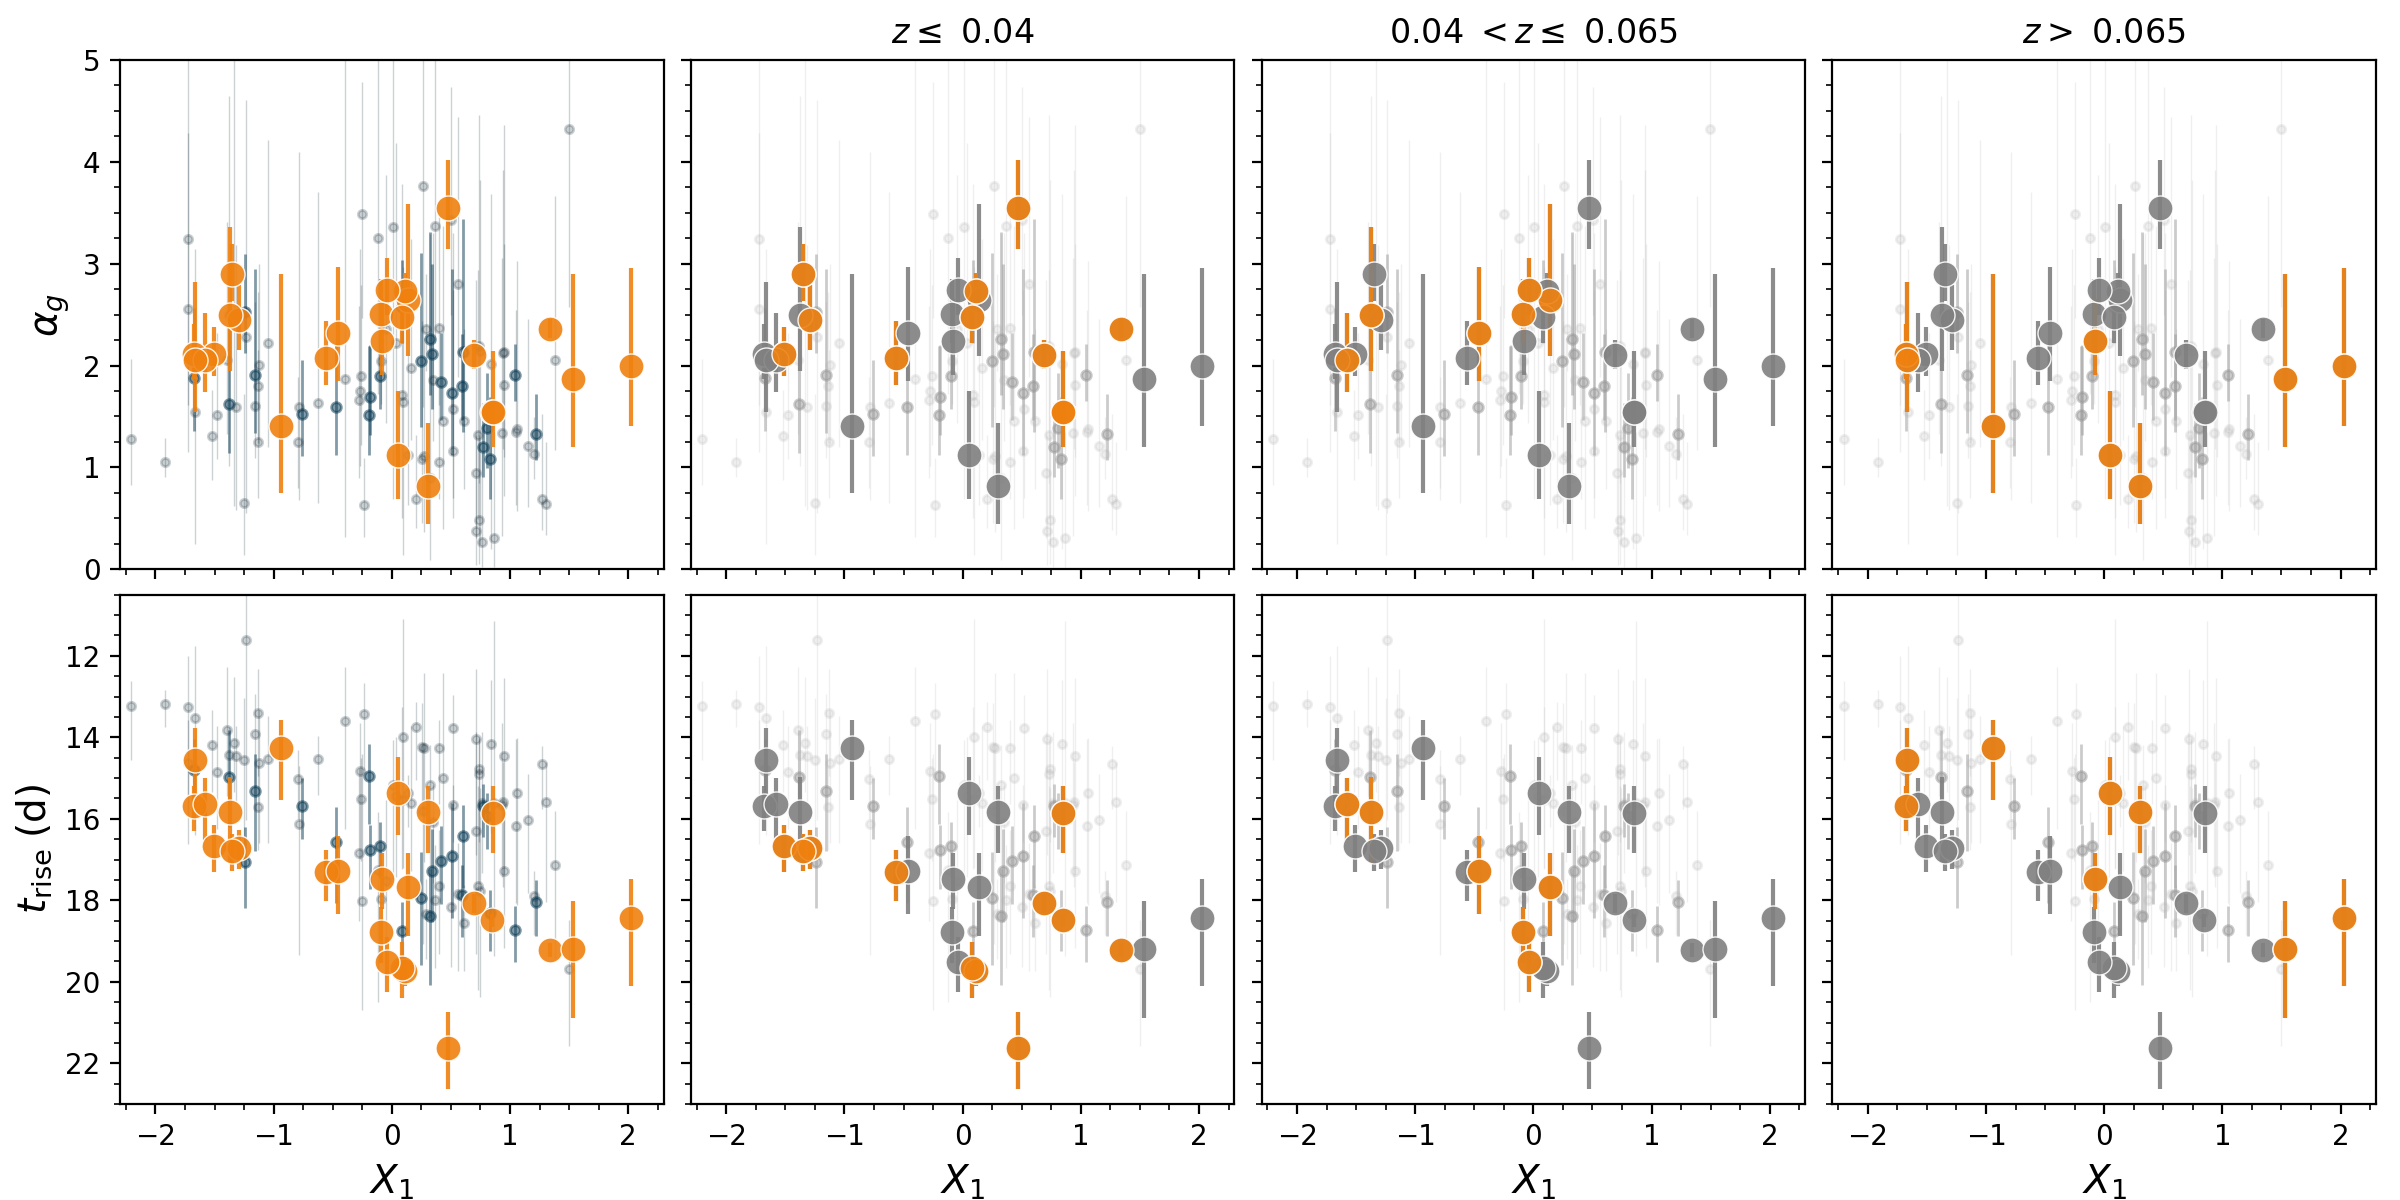

In [22]:
fig, axes = plt.subplots(2,4, sharex=True, sharey=False, figsize=(12,6))


axes[0,0].errorbar(salt_df.x1_salt2.values[normal_plot], alpha_g[normal_plot], 
             yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[0,0].errorbar(salt_df.x1_salt2.values[normal_good_plot], alpha_g[normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[0,0].errorbar(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[0,0].set_ylabel(r'$\alpha_g$', fontsize=14)

for ax in axes[0,1:]:
    ax.errorbar(salt_df.x1_salt2.values[normal_plot], alpha_g[normal_plot], 
                 yerr=alpha_g_unc[:,normal_plot], fmt='.', 
                  color='0.7', lw=0.5, alpha=0.2)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], alpha_g[normal_good_plot], 
                 yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
                 color='0.6', lw=1, ms=7, alpha=0.5)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host], 
                 yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
                 color='0.5', mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
#     ax.set_xlabel(r'$X_1$', fontsize=14)

axes[0,1].errorbar(salt_df.x1_salt2.values[good_host_low_z], alpha_g[good_host_low_z], 
             yerr=alpha_g_unc[:,good_host_low_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[0,1].set_title(r'$z \leq$ {}'.format(low_cut),fontsize=12)
axes[0,2].errorbar(salt_df.x1_salt2.values[good_host_mid_z], alpha_g[good_host_mid_z], 
             yerr=alpha_g_unc[:,good_host_mid_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[0,2].set_title(r'{} $< z \leq$ {}'.format(low_cut, high_cut),fontsize=12)
axes[0,3].errorbar(salt_df.x1_salt2.values[good_host_high_z], alpha_g[good_host_high_z], 
             yerr=alpha_g_unc[:,good_host_high_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[0,3].set_title(r'$z >$ {}'.format(high_cut),fontsize=12)

axes[1,0].errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[1,0].errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[1,0].errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[1,0].set_ylim(23,10)
axes[1,0].set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)

for ax in axes[1,1:]:
    ax.errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
                yerr=t_rise_unc[:,normal_plot], fmt='.', 
                color='0.7', lw=0.5, alpha=0.2)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
                yerr=t_rise_unc[:,normal_good_plot], fmt='.',
                color='0.6', lw=1, ms=7, alpha=0.5)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
                yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
                color='0.5', mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
    ax.set_xlabel(r'$X_1$', fontsize=14)
    ax.set_ylim(23,10)

axes[1,1].errorbar(salt_df.x1_salt2.values[good_host_low_z], t_rise[good_host_low_z], 
             yerr=t_rise_unc[:,good_host_low_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[1,2].errorbar(salt_df.x1_salt2.values[good_host_mid_z], t_rise[good_host_mid_z], 
             yerr=t_rise_unc[:,good_host_mid_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[1,3].errorbar(salt_df.x1_salt2.values[good_host_high_z], t_rise[good_host_high_z], 
             yerr=t_rise_unc[:,good_host_high_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)


for axnum, ax in enumerate(axes[0,:]):
    ax.set_ylim(0,5)
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    if axnum > 0:
        ax.set_yticklabels([])

for axnum, ax in enumerate(axes[1,:]):
    ax.set_ylim(23,10.5)
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(2))
    if axnum > 0:
        ax.set_yticklabels([])
        

axes[1,0].set_xlabel(r'$X_1$', fontsize=14)
axes[0,0].set_xlim(-2.3,2.3)
axes[0,0].xaxis.set_minor_locator(MultipleLocator(0.25))
axes[0,0].xaxis.set_major_locator(MultipleLocator(1))

fig.subplots_adjust(left=0.05,right=0.99,top=0.95,bottom=0.08,wspace=0.05,hspace=0.05)
fig.savefig('shape_correlations.pdf')

In [112]:
np.where((salt_df.x1_salt2 > 0.5) & (res.final_selection == 1) & (t_rise < 17) & (salt_df.z_source != 'Msl')

(array([89]),)

In [113]:
salt_df.iloc[89]

name                            ZTF18abkhcrj
z_Marshall                           0.03823
z_NED                                0.03829
ra_recenter                          256.651
dec_recenter                         24.5453
t0_SALT_adam_jd                  2.45834e+06
E_B_V_SandF                            0.045
z_Caltech                               -999
z_adopt                              0.03829
z_source                                 NED
z_adopt_unc                           0.0001
t0_B_salt2                       2.45834e+06
t0_g_salt2                       2.45834e+06
t0_r_salt2                       2.45835e+06
x0_salt2                         4.60531e-14
x1_salt2                            0.852223
c_salt2                             0.240413
fratio_gmax_2adam                9.01479e-08
fratio_rmax_2adam                  1.076e-07
t0_salt2_unc                       0.0579303
x0_salt2_unc                     1.46262e-15
x1_salt2_unc                        0.164701
c_salt2_un

## $M_B$ vs. rise time

<IPython.core.display.Javascript object>


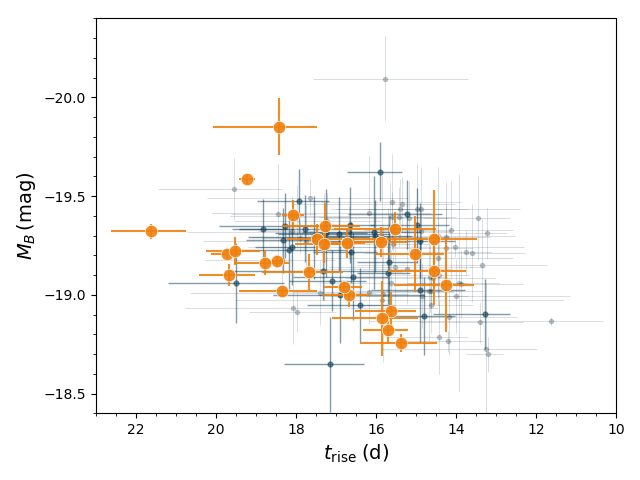

In [89]:
fig, ax = plt.subplots()

#  rise vs. redshift
ax.errorbar(t_rise[normal_plot], salt_df.B_abs0_SALT2corr.values[normal_plot],
            xerr=t_rise_unc[:,normal_plot], 
            yerr=salt_df.B_abs0_unc_SALT2corr.values[normal_plot],
            fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(t_rise[normal_good_plot], salt_df.B_abs0_SALT2corr.values[normal_good_plot],
            xerr=t_rise_unc[:,normal_good_plot], 
            yerr=salt_df.B_abs0_unc_SALT2corr.values[normal_good_plot],
            fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(t_rise[normal_good_host], salt_df.B_abs0_SALT2corr.values[normal_good_host],
            xerr=t_rise_unc[:,normal_good_host], 
            yerr=salt_df.B_abs0_unc_SALT2corr.values[normal_good_host],
            fmt='o', ms=9,
            color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

ax.set_xlabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
ax.set_xlim(23,10)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(2))

ax.set_ylabel(r'$M_B \,(\mathrm{mag})$', fontsize=14)
ax.set_ylim(-18.4,-20.4)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

fig.tight_layout()

### Panel plots to highlight redshift

<IPython.core.display.Javascript object>


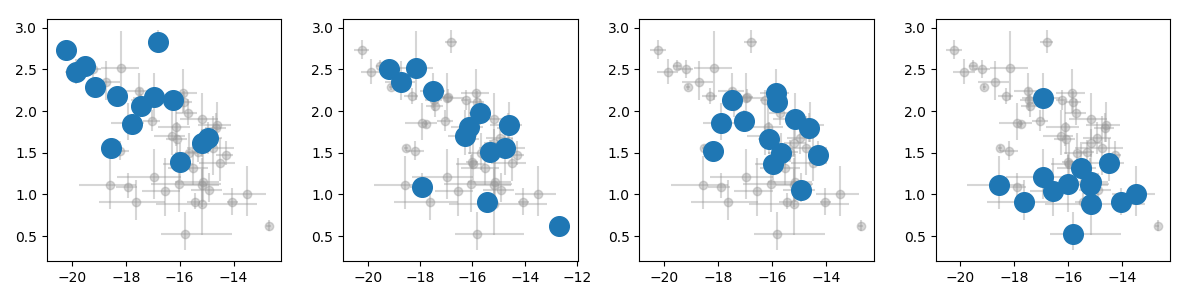

In [162]:
fig, axes = plt.subplots(1,4, figsize=(12,3))

idx_arr = norm_conv_spec
z_min_arr = [0, 0.048, 0.064, 0.078]
z_max_arr = [0.048, 0.064, 0.078, 0.2]
for ax, z_min, z_max in zip(axes, z_min_arr, z_max_arr):
    ax.errorbar(t0[idx_arr], alpha_g[idx_arr], yerr=alpha_g_unc[:,idx_arr], xerr=t0_unc[:,idx_arr], 
            fmt='o', color='0.6', ecolor='0.6', alpha=0.4)
    z_arr = np.intersect1d(idx_arr, np.where((z_min <= data_df.z_adopt.values) & (data_df.z_adopt.values < z_max))[0])
    ax.scatter(t0[z_arr], alpha_g[z_arr], zorder=10, s=200)
fig.tight_layout()

<IPython.core.display.Javascript object>


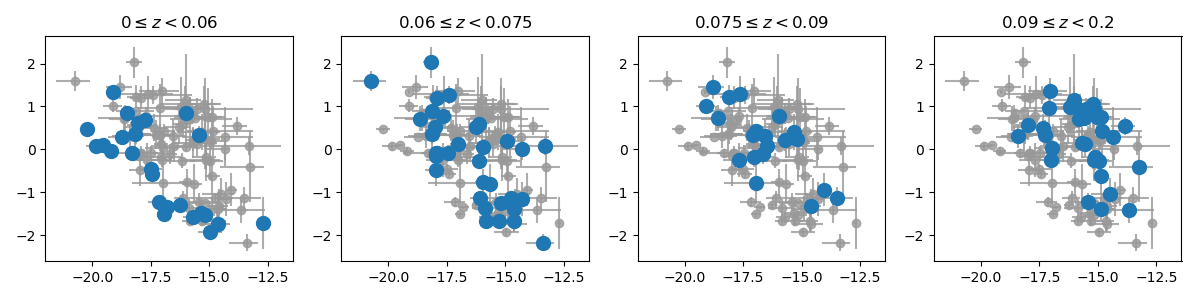

In [160]:
fig, axes = plt.subplots(1,4, figsize=(12,3))

idx_arr = np.intersect1d(all_norm, conv[0])
z_min_arr = [0, 0.06, 0.075, 0.09]
z_max_arr = [0.06, 0.075, 0.09, 0.2]
for ax, z_min, z_max in zip(axes, z_min_arr, z_max_arr):
    ax.errorbar(t0[idx_arr], data_df.x1_salt2.iloc[idx_arr], yerr=data_df.x1_salt2_unc.iloc[idx_arr], 
                xerr=t0_unc[:,idx_arr], fmt='o', color='0.6', ecolor='0.6', alpha=0.8)
    z_arr = np.intersect1d(idx_arr, np.where((z_min <= data_df.z_adopt.values) & (data_df.z_adopt.values < z_max))[0])
    ax.scatter(t0[z_arr], data_df.x1_salt2.iloc[z_arr], zorder=10,s=100)
    ax.set_title(r'${} \leq z < {}$'.format(z_min, z_max))
fig.tight_layout()

In [154]:
np.percentile(data_df.z_adopt.iloc[np.intersect1d(all_norm, conv[0])].values, (25,50,75))

array([0.06139875, 0.074     , 0.09252025])